<a href="https://colab.research.google.com/github/ty3117/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Tyler_Sheppatd_LS_DS_123_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

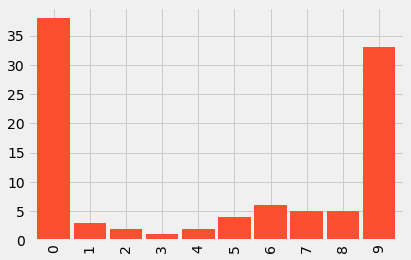

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33])

fake.plot.bar(color='C1', width=0.9);

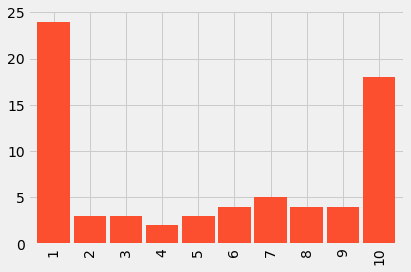

In [0]:
fake2=pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=500)
display(example)

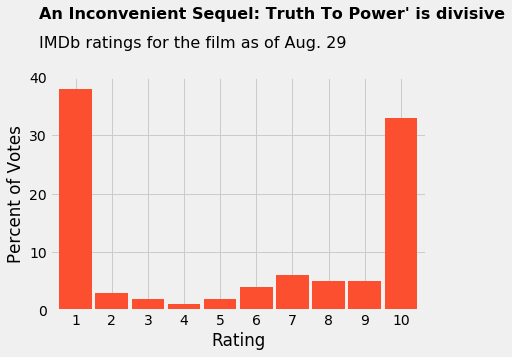

In [0]:
counts = [38, 3, 2, 1, 2, 4, 6, 5, 5, 33]
data_list = []

for i, c in enumerate(counts, 1):
    data_list = data_list + [i]*c
    
fake2 = pd.Series(data_list)
      
plt.style.use('fivethirtyeight')
fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9, rot=0);

plt.text(x=-1,
       y=50,
       fontsize=16,
       fontweight='bold',
       s="An Inconvenient Sequel: Truth To Power' is divisive")

plt.text(x=-1,
        y=45,
        fontsize=16,
        s="IMDb ratings for the film as of Aug. 29")

plt.xlabel('Rating')
plt.ylabel('Percent of Votes')
plt.yticks(range(0, 50, 10));

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.shape

(80053, 27)

In [0]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
df.sample(1).T

,42238
timestamp,2017-08-16 03:20:04.686411
respondents,8
category,IMDb staff
link,http://www.imdb.com/title/tt6322922/ratings-im...
average,8.4
mean,7.2
median,8
1_votes,1
2_votes,0
3_votes,0


In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
df = df.set_index('timestamp')
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
df['category'].value_counts()

Males                 4216
Top 1000 voters       4216
Males under 18        4216
Aged under 18         4216
IMDb users            4216
US users              4216
IMDb staff            4216
Females               4216
Females Aged 30-44    4216
Males Aged 30-44      4216
Males Aged 45+        4216
Females Aged 18-29    4216
Non-US users          4216
Males Aged 18-29      4216
Aged 30-44            4216
Aged 18-29            4216
Females Aged 45+      4216
Aged 45+              4216
Females under 18      4165
Name: category, dtype: int64

In [0]:
df_imdb = df[df['category'] == 'IMDb users']
df_imdb.shape

(4216, 26)

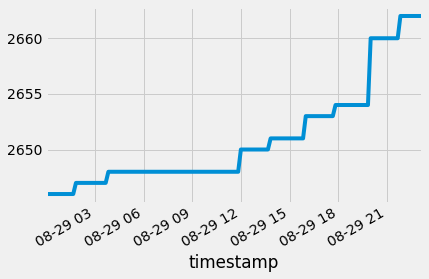

In [0]:
lastday = df['2017-08-29']
lastday[lastday['category'] == 'IMDb users']['respondents'].plot()

In [0]:
df = df.sort_index()
df_imdb = df[df['category'] == 'IMDb users']
final = df_imdb.tail(1)
final

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
columns = ['%s_pct' % i for i in range(1,11)]
final[columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


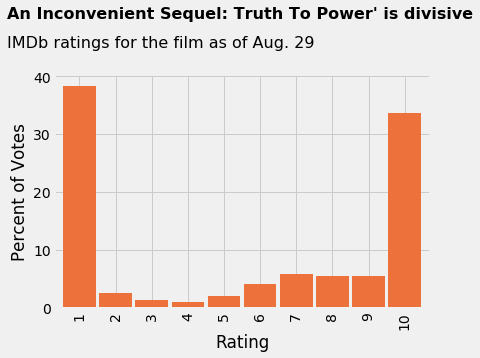

In [0]:
data = final[columns].T
data.index = range(1,11)

plt.style.use('fivethirtyeight')

data.plot.bar(color='#ed713a', width=0.9, legend=False)

plt.text(x=-2,
       y=50,
       fontsize=16,
       fontweight='bold',
       s="An Inconvenient Sequel: Truth To Power' is divisive")

plt.text(x=-2,
        y=45,
        fontsize=16,
        s="IMDb ratings for the film as of Aug. 29")

plt.xlabel('Rating')
plt.ylabel('Percent of Votes')
plt.yticks(range(0, 50, 10));

In [0]:
display(example)

**Stretch Goals**

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/checking-our-work-data/master/nba_games.csv')
df.head(20)

,season,date,team1,team2,prob1,prob1_outcome,prob2,prob2_outcome
0,2018,2018-06-08,Cavaliers,Warriors,0.442035,0,0.557965,1
1,2018,2018-06-06,Cavaliers,Warriors,0.465712,0,0.534288,1
2,2018,2018-06-03,Warriors,Cavaliers,0.761494,1,0.238506,0
3,2018,2018-05-31,Warriors,Cavaliers,0.759196,1,0.240804,0
4,2018,2018-05-28,Rockets,Warriors,0.650880,0,0.349120,1
5,2018,2018-05-27,Celtics,Cavaliers,0.583633,0,0.416367,1
6,2018,2018-05-26,Warriors,Rockets,0.557893,1,0.442107,0
7,2018,2018-05-25,Cavaliers,Celtics,0.665065,1,0.334935,0
8,2018,2018-05-24,Rockets,Warriors,0.688346,1,0.311654,0
9,2018,2018-05-23,Celtics,Cavaliers,0.573248,1,0.426752,0


I couldn't find a dataset to make a good visualization with :(